In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

C:\Users\Admin\anaconda3\envs\aitd\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [5]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1164.066352,1177.304802,1163.244669,1175.889648
2023-01-03,1170.936536,1174.565705,1163.062026,1167.284546
2023-01-04,1167.261851,1169.110728,1147.632506,1149.709595
2023-01-05,1151.969321,1157.858149,1143.067616,1147.655396
2023-01-06,1153.407118,1163.130505,1149.595379,1158.086182
...,...,...,...,...
2023-06-23,1154.434210,1156.488477,1146.719448,1147.974854
2023-06-26,1144.437098,1148.271658,1136.083222,1139.210205


In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [7]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    print(y_pred)
    
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[ 0.          0.47109709  0.28312073  0.38457495  0.31995375  0.43225457
  0.475965    0.36423261  0.39496755  0.25162727  0.37047078  0.21507116
  0.43168273  0.23110837  0.40476922  0.18382591  0.35412467  0.16927001
  0.25964912  0.07590142  0.29221066  0.08423823  0.23981549  0.07024585
  0.22775823  0.04583104  0.19722078  0.16571915  0.20350075  0.12520506
  0.16551384  0.25403301  0.29701061  0.25391419  0.31596235  0.20113303
  0.34969329  0.08971929  0.29830734  0.14704289  0.24738504  0.0534913
  0.27717134  0.034597    0.38890493  0.12232767  0.38262913  0.01517406
  0.26338957 -0.04775931  0.21352517 -0.1110

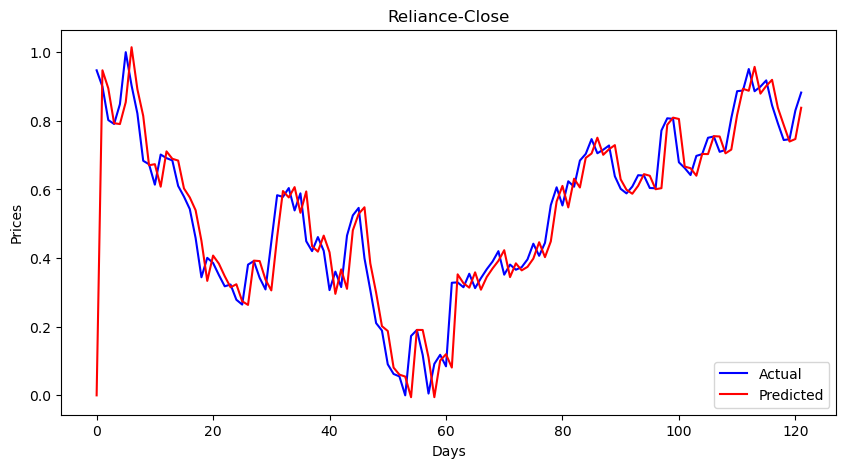

In [8]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [9]:
len(data1)

122

In [10]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

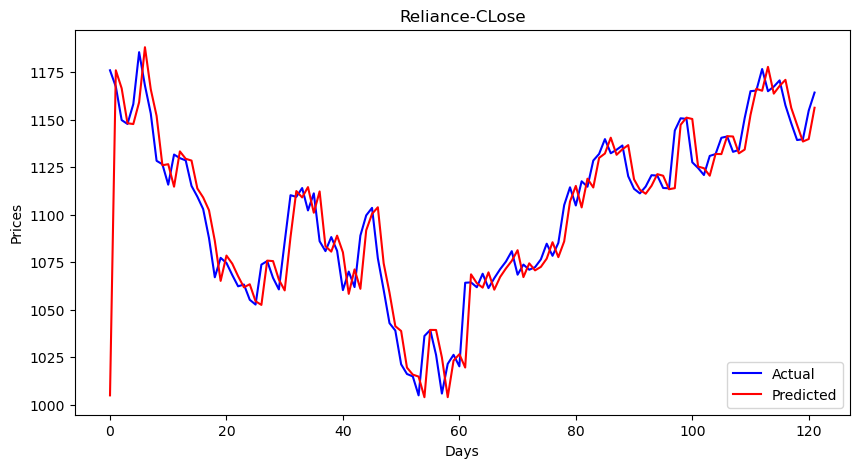

In [12]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [13]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [14]:
forecast

array([0.88671567, 0.88672378])

In [15]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [16]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [17]:
forecast_stock_price_test_oriF

,Closefore
0,1164.974877
1,1164.976342


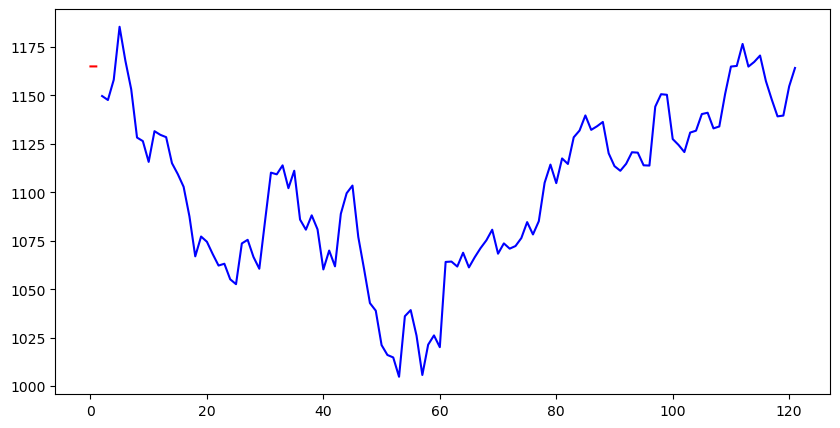

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
